# 5. Modeling

## 5.1 Modeling Approach

In this section, we will leverage the power of a combination of logistic regression and marginal logistic regression GEE modeling, which will allow us to:

1. **Assess Feature Importance:** By examining the coefficients and associated p-values in the marginal logistic regression model, we can identify the most influential predictors of diabetes risk. This will provide crucial insights into the specific factors that have the strongest association with the development of diabetes.

2. **Determine Statistical Significance:** The marginal logistic regression model will enable us to assess the statistical significance of each predictor included in the analysis. This will allow us to confidently identify the factors that have a robust and meaningful relationship with diabetes risk, separating the signal from the noise.

3. **Enhance Interpretability:** Compared to more complex machine learning models, marginal logistic regression offers greater interpretability, making it easier for stakeholders to understand the relationships between the predictors and the outcome of diabetes risk. This enhanced interpretability is a valuable asset in translating our findings into actionable recommendations.

4. **Compare with GEE:** To further strengthen the rigor of our analysis, we will compare the findings of the marginal logistic regression model with those obtained from the Generalized Estimating Equations (GEE) approach. This comparative analysis will help us assess the consistency of our conclusions across different modeling techniques, ensuring the robustness of our findings.

By employing this comprehensive modeling strategy, we aim to provide concrete, data-driven recommendations for diabetes prevention and intervention strategies that can have a meaningful impact on public health. The insights gained from this rigorous analysis will serve as a valuable foundation for developing targeted and effective interventions to address the pressing challenge of diabetes.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

pd.set_option("display.max_columns", None)

In [2]:
# Loading the cleaned dataset
df = pd.read_csv(r"C:/Users/hp/Desktop/cleaned.csv")

In [3]:
df.head()

,Unnamed: 0,SEQN,ALQ101,ALQ110,ALQ130,SMQ020,RIAGENDR,RIDAGEYR,RIDRETH1,DMDCITZN,DMDEDUC2,DMDMARTL,DMDHHSIZ,WTINT2YR,SDMVPSU,SDMVSTRA,INDFMPIR,BPXSY1,BPXDI1,BPXSY2,BPXDI2,BMXWT,BMXHT,BMXBMI,BMXLEG,BMXARML,BMXARMC,BMXWAIST,HIQ210,diabetes_risk_score,avg_systolic,avg_diastolic,high_diabetes_risk,BMI_Category,BP_Category,Age_Group,Alcohol_Score,Education_Simple,RIAGENDRx,Race_Ethnicity,Marital_Status,SMQ020x
0,0,83732,1.0,1.502521,1.000000,1,1,62,3,1.0,5.0,1.0,2,134671.37,1,125,4.39,128.0,70.0,124.0,64.0,94.8,184.5,27.8,43.3,43.6,35.9,101.1,2.000000,4,126.0,67.0,0,Overweight,Elevated,60+,1.000000,College Graduate or Above,Male,Non-Hispanic White,Married,Yes
1,1,83733,1.0,1.489357,6.000000,1,1,53,3,2.0,3.0,3.0,1,24328.56,1,125,1.32,146.0,88.0,140.0,88.0,90.4,171.4,30.8,38.0,40.0,33.2,107.9,1.911837,12,143.0,88.0,1,Obese,Stage 1 Hypertension,46-60,6.000000,High School,Male,Non-Hispanic White,Divorced,Yes
2,2,83734,1.0,1.552956,3.883318,1,1,78,3,1.0,3.0,1.0,2,12400.01,1,131,1.51,138.0,46.0,132.0,44.0,83.4,170.1,28.8,35.6,37.0,31.0,116.5,2.000000,7,135.0,45.0,1,Overweight,Stage 1 Hypertension,60+,3.883318,High School,Male,Non-Hispanic White,Married,Yes
3,3,83735,2.0,1.000000,1.000000,2,2,56,3,1.0,5.0,6.0,1,102718.00,1,131,5.00,132.0,72.0,134.0,68.0,109.8,160.9,42.4,38.5,37.7,38.3,110.1,2.000000,7,133.0,70.0,1,Obese,Stage 1 Hypertension,46-60,0.000000,College Graduate or Above,Female,Non-Hispanic White,Living with Partner,No
4,4,83736,2.0,1.000000,1.000000,2,2,42,4,1.0,4.0,3.0,5,17627.67,2,126,1.23,100.0,70.0,114.0,54.0,55.2,164.9,20.3,37.4,36.0,27.2,80.4,2.000000,1,107.0,62.0,0,Normal,Normal,31-45,0.000000,Some College,Female,Non-Hispanic Black,Divorced,No


In [4]:
df.drop('Unnamed: 0', axis = 1, inplace=True)

In [5]:
df.columns

Index(['SEQN', 'ALQ101', 'ALQ110', 'ALQ130', 'SMQ020', 'RIAGENDR', 'RIDAGEYR',
       'RIDRETH1', 'DMDCITZN', 'DMDEDUC2', 'DMDMARTL', 'DMDHHSIZ', 'WTINT2YR',
       'SDMVPSU', 'SDMVSTRA', 'INDFMPIR', 'BPXSY1', 'BPXDI1', 'BPXSY2',
       'BPXDI2', 'BMXWT', 'BMXHT', 'BMXBMI', 'BMXLEG', 'BMXARML', 'BMXARMC',
       'BMXWAIST', 'HIQ210', 'diabetes_risk_score', 'avg_systolic',
       'avg_diastolic', 'high_diabetes_risk', 'BMI_Category', 'BP_Category',
       'Age_Group', 'Alcohol_Score', 'Education_Simple', 'RIAGENDRx',
       'Race_Ethnicity', 'Marital_Status', 'SMQ020x'],
      dtype='object')

In [11]:
df.describe()

,SEQN,ALQ101,ALQ110,ALQ130,SMQ020,RIAGENDR,RIDAGEYR,RIDRETH1,DMDCITZN,DMDEDUC2,DMDMARTL,DMDHHSIZ,WTINT2YR,SDMVPSU,SDMVSTRA,INDFMPIR,BPXSY1,BPXDI1,BPXSY2,BPXDI2,BMXWT,BMXHT,BMXBMI,BMXLEG,BMXARML,BMXARMC,BMXWAIST,HIQ210,diabetes_risk_score,avg_systolic,avg_diastolic,high_diabetes_risk,Alcohol_Score
count,5735.000000,5735.000000,5735.000000,5735.000000,5735.000000,5735.000000,5735.000000,5735.000000,5735.000000,5735.000000,5735.000000,5735.000000,5735.000000,5735.000000,5735.000000,5735.000000,5735.000000,5735.000000,5735.000000,5735.000000,5735.000000,5735.000000,5735.000000,5735.000000,5735.000000,5735.000000,5735.000000,5735.000000,5735.000000,5735.000000,5735.000000,5735.000000,5735.000000
mean,88678.583435,1.338184,1.566562,3.907708,1.607149,1.518919,48.052310,3.042371,1.185419,3.449351,2.664006,3.323801,40312.412352,1.487881,126.236617,2.383451,125.409102,69.688830,124.747927,69.348366,81.344937,166.137156,29.384366,38.520674,37.125650,33.113127,99.689363,1.911430,5.820401,125.078515,69.518598,0.631212,2.016268
std,2882.139237,0.483800,0.350932,26.358750,0.571975,0.499686,18.431011,1.296793,0.491641,1.286758,2.322087,1.724670,38768.921774,0.499897,4.244406,1.545327,18.499884,12.774608,18.245035,12.853038,21.646508,10.039929,7.058011,3.833832,2.775152,5.255989,16.903921,0.377105,2.751700,18.209658,12.458833,0.482518,13.365545
min,83732.000000,0.940961,1.000000,1.000000,1.000000,1.000000,18.000000,1.000000,1.000000,1.000000,0.717362,1.000000,5330.960000,1.000000,119.000000,-6.346614,82.000000,0.000000,83.540033,0.000000,32.400000,129.700000,14.500000,26.000000,28.200000,17.100000,58.700000,1.000000,0.000000,82.770016,0.000000,0.000000,0.000000
25%,86164.000000,1.000000,1.475414,2.000000,1.000000,1.000000,32.000000,2.000000,1.000000,3.000000,1.000000,2.000000,17164.085000,1.000000,123.000000,1.100000,114.000000,62.000000,112.000000,62.000000,66.050000,158.700000,24.400000,36.000000,35.200000,29.500000,87.912262,1.953515,4.000000,113.000000,62.000000,0.000000,0.000000
50%,88668.000000,1.000000,1.563501,3.841405,2.000000,2.000000,48.000000,3.000000,1.000000,4.000000,2.000000,3.000000,24654.860000,1.000000,126.000000,2.060000,123.430486,70.000000,122.000000,70.000000,78.300000,166.000000,28.400000,38.500000,37.024214,32.700000,98.300000,2.000000,6.000000,123.000000,70.000000,1.000000,1.000000
75%,91178.500000,2.000000,1.662829,3.931414,2.000000,2.000000,63.000000,4.000000,1.000000,4.015368,5.000000,5.000000,42862.305000,2.000000,130.000000,3.510000,134.000000,78.000000,134.000000,76.000000,92.600000,173.400000,33.000000,41.100000,39.000000,36.200000,109.200000,2.000000,8.000000,134.000000,77.000000,1.000000,3.000000
max,93702.000000,9.000000,9.000000,999.000000,9.000000,2.000000,80.000000,5.000000,9.000000,9.000000,77.000000,7.000000,233755.840000,2.000000,133.000000,5.115289,236.000000,136.741813,238.000000,144.000000,198.900000,202.700000,67.300000,53.776900,47.400000,58.837332,185.275251,9.000000,13.000000,234.000000,140.370907,1.000000,999.000000


In [4]:
# List of categorical columns to encode
categorical_cols = ['RIAGENDR', 'RIDRETH1', 'DMDCITZN', 'DMDEDUC2', 
                    'DMDMARTL', 'BMI_Category', 'BP_Category', 'Age_Group', 
                    'Education_Simple', 'RIAGENDRx', 'Race_Ethnicity', 
                    'Marital_Status', 'SMQ020x']

# Encode categorical columns
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  # Store the encoder to inverse transform later if needed

In [6]:
df.drop("Unnamed: 0", axis=1, inplace=True)

In [12]:
df.head()

,SEQN,ALQ101,ALQ110,ALQ130,SMQ020,RIAGENDR,RIDAGEYR,RIDRETH1,DMDCITZN,DMDEDUC2,DMDMARTL,DMDHHSIZ,WTINT2YR,SDMVPSU,SDMVSTRA,INDFMPIR,BPXSY1,BPXDI1,BPXSY2,BPXDI2,BMXWT,BMXHT,BMXBMI,BMXLEG,BMXARML,BMXARMC,BMXWAIST,HIQ210,diabetes_risk_score,avg_systolic,avg_diastolic,high_diabetes_risk,BMI_Category,BP_Category,Age_Group,Alcohol_Score,Education_Simple,RIAGENDRx,Race_Ethnicity,Marital_Status,SMQ020x
0,83732,1.0,1.502521,1.000000,1,1,62,3,1.0,5.0,1.0,2,134671.37,1,125,4.39,128.0,70.0,124.0,64.0,94.8,184.5,27.8,43.3,43.6,35.9,101.1,2.000000,4,126.0,67.0,0,Overweight,Elevated,60+,1.000000,College Graduate or Above,Male,Non-Hispanic White,Married,Yes
1,83733,1.0,1.489357,6.000000,1,1,53,3,2.0,3.0,3.0,1,24328.56,1,125,1.32,146.0,88.0,140.0,88.0,90.4,171.4,30.8,38.0,40.0,33.2,107.9,1.911837,12,143.0,88.0,1,Obese,Stage 1 Hypertension,46-60,6.000000,High School,Male,Non-Hispanic White,Divorced,Yes
2,83734,1.0,1.552956,3.883318,1,1,78,3,1.0,3.0,1.0,2,12400.01,1,131,1.51,138.0,46.0,132.0,44.0,83.4,170.1,28.8,35.6,37.0,31.0,116.5,2.000000,7,135.0,45.0,1,Overweight,Stage 1 Hypertension,60+,3.883318,High School,Male,Non-Hispanic White,Married,Yes
3,83735,2.0,1.000000,1.000000,2,2,56,3,1.0,5.0,6.0,1,102718.00,1,131,5.00,132.0,72.0,134.0,68.0,109.8,160.9,42.4,38.5,37.7,38.3,110.1,2.000000,7,133.0,70.0,1,Obese,Stage 1 Hypertension,46-60,0.000000,College Graduate or Above,Female,Non-Hispanic White,Living with Partner,No
4,83736,2.0,1.000000,1.000000,2,2,42,4,1.0,4.0,3.0,5,17627.67,2,126,1.23,100.0,70.0,114.0,54.0,55.2,164.9,20.3,37.4,36.0,27.2,80.4,2.000000,1,107.0,62.0,0,Normal,Normal,31-45,0.000000,Some College,Female,Non-Hispanic Black,Divorced,No


We will start with a base line model. In the case, due to violation of the linearity assumption, we will continue with the `Logistic Regression` model first!

In [13]:
encoder = LabelEncoder()
# List of categorical columns to encode
categorical_cols = ['Race_Ethnicity', 'Age_Group', 'BMI_Category', 'SMQ020x', 'Marital_Status']

# Apply label encoding to each categorical column
for col in categorical_cols:
    df[col + '_Encoded'] = encoder.fit_transform(df[col])

# Print the encoded data (optional)
print(df)

       SEQN    ALQ101    ALQ110    ALQ130  SMQ020  RIAGENDR  RIDAGEYR  \
0     83732  1.000000  1.502521  1.000000       1         1        62   
1     83733  1.000000  1.489357  6.000000       1         1        53   
2     83734  1.000000  1.552956  3.883318       1         1        78   
3     83735  2.000000  1.000000  1.000000       2         2        56   
4     83736  2.000000  1.000000  1.000000       2         2        42   
...     ...       ...       ...       ...     ...       ...       ...   
5730  93695  2.000000  2.000000  3.933346       1         2        76   
5731  93696  2.000000  2.000000  3.948539       2         1        26   
5732  93697  1.000000  1.588007  1.000000       1         2        80   
5733  93700  1.336427  1.557080  3.960074       1         1        35   
5734  93702  1.000000  1.657554  2.000000       2         2        24   

      RIDRETH1  DMDCITZN  DMDEDUC2  DMDMARTL  DMDHHSIZ   WTINT2YR  SDMVPSU  \
0            3       1.0       5.0       1.0 

## 5.2 Logistic Rregression: Baseline Model

In [15]:
# Identify the relevant features based on the EDA
X = df[['avg_systolic',
        'RIAGENDR',
        'BMXBMI',
        'Race_Ethnicity_Encoded',
        'Age_Group_Encoded', 
        'BMI_Category_Encoded', 
       'SMQ020x_Encoded',
       'Marital_Status_Encoded']]

y = df['high_diabetes_risk']  # Basic features for the baseline


# Split data: train, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

In [16]:
# Check the shape of each set to verify
print("Training set shape:", X_train.shape)
print("Validation set shape:", X_val.shape)
print("Test set shape:", X_test.shape)

Training set shape: (4014, 8)
Validation set shape: (860, 8)
Test set shape: (861, 8)


In [17]:
# Because Logistic regression is sensitive to feature scales, we will scale the data

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data, then transform the training, validation, and test sets
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

In [18]:
# Define the parameter grid
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization strength
    'penalty': ['l1', 'l2'],  # Regularization type
    'solver': ['liblinear', 'saga']  # Solver algorithms for different penalties
}

# Create logistic regression model
log_reg = LogisticRegression(random_state=42, max_iter=1000)

# Create GridSearchCV object
grid_search = GridSearchCV(estimator=log_reg, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the scaled training data
grid_search.fit(X_train_scaled, y_train)


# Get the best parameters
best_params = grid_search.best_params_
print(f"Best Parameters: {best_params}")

# Get the best model
best_model = grid_search.best_estimator_


# Predict on training set using the best model
y_train_pred = best_model.predict(X_train_scaled)

# Predict on validation set using the best model
y_val_pred = best_model.predict(X_val_scaled)

Best Parameters: {'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}


In [19]:
# --- Evaluation Metrics ---

# Training Metrics
train_accuracy = accuracy_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred)
train_recall = recall_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred)


print("\nTraining Metrics:")
print(f"Training Accuracy: {train_accuracy:.2f}")
print(f"Training Precision: {train_precision:.2f}")
print(f"Training Recall: {train_recall:.2f}")
print(f"Training F1 Score: {train_f1:.2f}")


# Validation Metrics
val_accuracy = accuracy_score(y_val, y_val_pred)
val_precision = precision_score(y_val, y_val_pred)
val_recall = recall_score(y_val, y_val_pred)
val_f1 = f1_score(y_val, y_val_pred)

print("\nValidation Metrics:")
print(f"Validation Accuracy: {val_accuracy:.2f}")
print(f"Validation Precision: {val_precision:.2f}")
print(f"Validation Recall: {val_recall:.2f}")
print(f"Validation F1 Score: {val_f1:.2f}")


Training Metrics:
Training Accuracy: 0.88
Training Precision: 0.90
Training Recall: 0.92
Training F1 Score: 0.91

Validation Metrics:
Validation Accuracy: 0.90
Validation Precision: 0.92
Validation Recall: 0.93
Validation F1 Score: 0.92



Confusion Matrix:
 [[270  47]
 [ 37 506]]

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.85      0.87       317
           1       0.92      0.93      0.92       543

    accuracy                           0.90       860
   macro avg       0.90      0.89      0.89       860
weighted avg       0.90      0.90      0.90       860



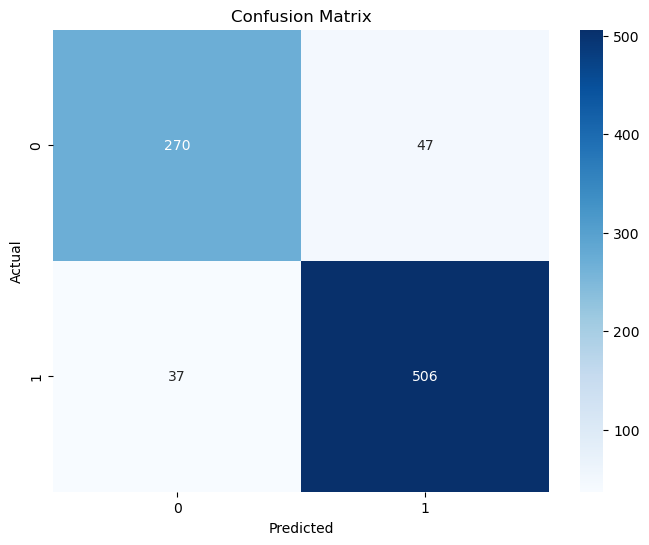


AUC Score: 0.9628


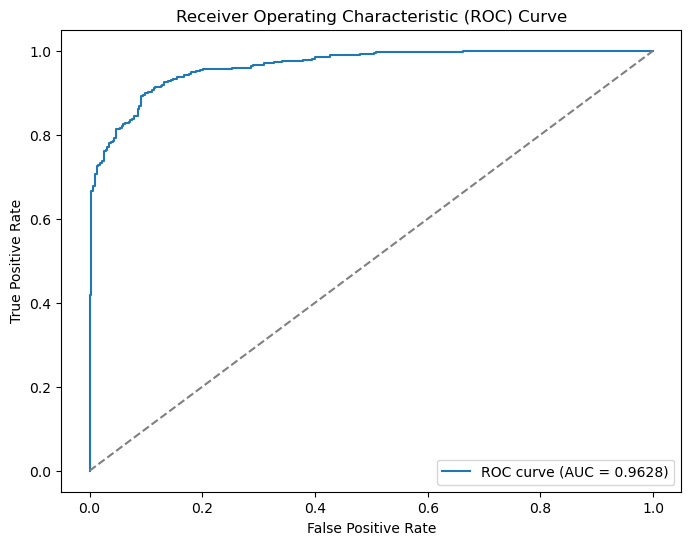

In [20]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
import seaborn as sns
# Confusion Matrix
cm = confusion_matrix(y_val, y_val_pred)
print("\nConfusion Matrix:\n", cm)

# Classification Report
cr = classification_report(y_val, y_val_pred)
print("\nClassification Report:\n", cr)

# Confusion Matrix
cm = confusion_matrix(y_val, y_val_pred)

# Visualize Confusion Matrix with seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Predict probabilities for ROC and AUC
y_val_prob = best_model.predict_proba(X_val_scaled)[:, 1]

# AUC Score
auc = roc_auc_score(y_val, y_val_prob)
print(f"\nAUC Score: {auc:.4f}")

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_val, y_val_prob)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC curve (AUC = {auc:.4f})")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend()
plt.show()


Confusion Matrix:
 [[270  48]
 [ 42 501]]


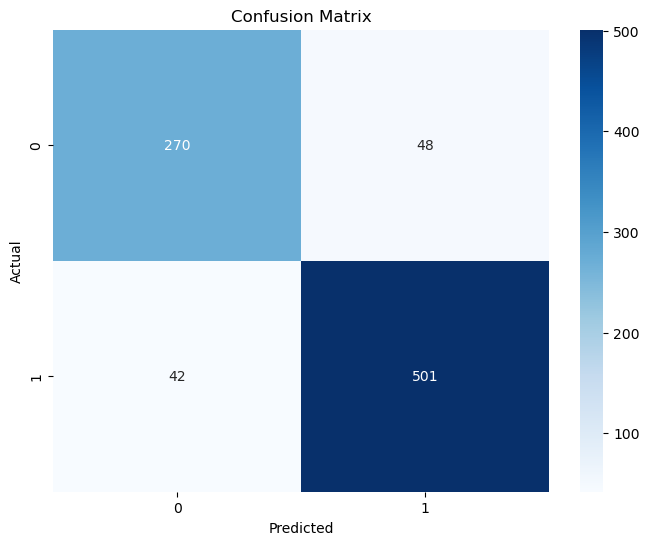


Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.85      0.86       318
           1       0.91      0.92      0.92       543

    accuracy                           0.90       861
   macro avg       0.89      0.89      0.89       861
weighted avg       0.90      0.90      0.90       861


AUC Score: 0.9647


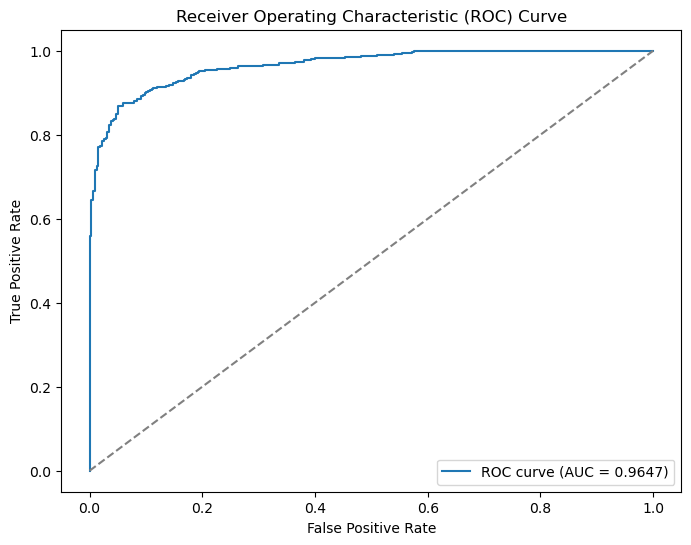

In [21]:
# ----Evaluating on the testset----#

# Get the best model
best_model = grid_search.best_estimator_

# Predict on testing set using the best model
y_test_pred = best_model.predict(X_test_scaled)

# Predict probabilities for ROC and AUC
y_test_prob = best_model.predict_proba(X_test_scaled)[:, 1]

# --- Evaluation Metrics on Testing Set ---

# Confusion Matrix
cm = confusion_matrix(y_test, y_test_pred)
print("\nConfusion Matrix:\n", cm)

# Visualize Confusion Matrix with seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Classification Report
cr = classification_report(y_test, y_test_pred)
print("\nClassification Report:\n", cr)

# AUC Score
auc = roc_auc_score(y_test, y_test_prob)
print(f"\nAUC Score: {auc:.4f}")

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_test_prob)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC curve (AUC = {auc:.4f})")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend()
plt.show()

Despite the limitations, the logistic regression model achieved excellent performance on the test set, demonstrating its ability to accurately predict diabetes risk. This model serves as a strong baseline for future work. Further exploration with more complex models (e.g., Random Forests, Gradient Boosting) or techniques that account for clustering could potentially lead to even better performance.

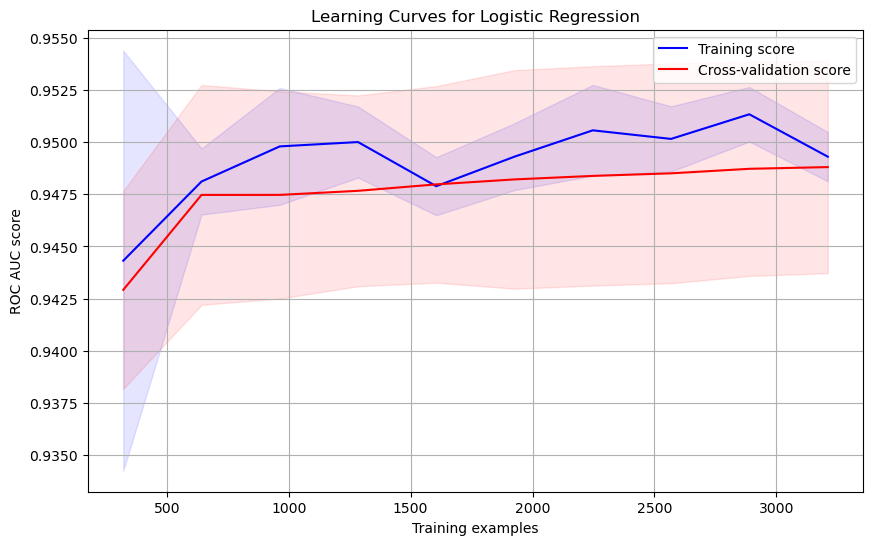

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

# ... (your other code for data splitting, preprocessing, model training, etc.) ...

# Learning curves
train_sizes, train_scores, val_scores = learning_curve(
    best_model,  # Your trained Random Forest model
    X_train_scaled,  # Your scaled training features
    y_train,  # Your training labels
    train_sizes=np.linspace(0.1, 1.0, 10),  # Array of training set sizes
    cv=5,  # Number of cross-validation folds
    scoring="roc_auc",  # Scoring metric
    n_jobs=-1,  # Use all available cores for parallel processing (optional)
)

# Calculate mean and standard deviation of training and validation scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
val_scores_mean = np.mean(val_scores, axis=1)
val_scores_std = np.std(val_scores, axis=1)

# Plot the learning curves
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, label="Training score", color="blue")
plt.fill_between(
    train_sizes,
    train_scores_mean - train_scores_std,
    train_scores_mean + train_scores_std,
    alpha=0.1,
    color="blue",
)
plt.plot(train_sizes, val_scores_mean, label="Cross-validation score", color="red")
plt.fill_between(
    train_sizes,
    val_scores_mean - val_scores_std,
    val_scores_mean + val_scores_std,
    alpha=0.1,
    color="red",
)
plt.xlabel("Training examples")
plt.ylabel("ROC AUC score")
plt.title("Learning Curves for Logistic Regression")
plt.legend(loc="best")
plt.grid(True)
plt.show()

1. Performance Range: The model achieves AUC-ROC scores between 0.935-0.955
Convergence:

Training and cross-validation scores converge around 500-750 training examples
The gap between training and validation scores is relatively small (~0.005), indicating good bias-variance balance


2. Training Behavior:

Training score (blue) shows slight fluctuations but remains stable around 0.95
Cross-validation score (red) stabilizes around 0.947-0.948

Variance: The shaded areas show relatively small variance in both curves


3. Key insights:

Model Stability:
Logistic Regression shows more stable behavior with better generalization

Bias-Variance Trade-off:
Logistic Regression: Better balanced, smaller gap between training and validation

To that end, we wiil engineer additional interactions terms and carefully observes the models performance


### 5.2.1 Hyperparameter for Logistic Regression

In [25]:
# Add interaction terms
df['BMI_Age'] = df['BMXBMI'] * df['RIDAGEYR']
df['BMI_BP'] = df['BMXBMI'] * df['avg_systolic']

In [46]:
# Test demographic interaction terms
def create_demographic_interactions(X):
    X['Race_Age'] = X['Race_Ethnicity_Encoded'] * X['RIDAGEYR']
    X['Gender_BP'] = X['RIAGENDR'] * X['avg_systolic']
    return X

result = create_demographic_interactions(df)

In [29]:
# Identify the relevant features based on the EDA

X = df[['avg_systolic',
        'RIAGENDR',
        'BMXBMI',
        'Race_Ethnicity_Encoded',
        'Age_Group_Encoded', 
        'BMI_Category_Encoded', 
       'SMQ020x_Encoded',
       'Marital_Status_Encoded',
       'BMI_Age', 
       'BMI_BP',
       'Gender_BP']]

y = df['high_diabetes_risk']  # Basic features for the baseline


# Split data: train, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

In [30]:
# Check the shape of each set to verify
print("Training set shape:", X_train.shape)
print("Validation set shape:", X_val.shape)
print("Test set shape:", X_test.shape)

Training set shape: (4014, 11)
Validation set shape: (860, 11)
Test set shape: (861, 11)


In [31]:
# Because Logistic regression is sensitive to feature scales, we will scale the data

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data, then transform the training, validation, and test sets
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

In [32]:
# Define the parameter grid
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization strength
    'penalty': ['l1', 'l2'],  # Regularization type
    'solver': ['liblinear', 'saga']  # Solver algorithms for different penalties
}

# Create logistic regression model
log_reg = LogisticRegression(random_state=42, max_iter=1000)

# Create GridSearchCV object
grid_search = GridSearchCV(estimator=log_reg, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the scaled training data
grid_search.fit(X_train_scaled, y_train)


# Get the best parameters
best_params = grid_search.best_params_
print(f"Best Parameters: {best_params}")

# Get the best model
best_model = grid_search.best_estimator_


# Predict on training set using the best model
y_train_pred = best_model.predict(X_train_scaled)

# Predict on validation set using the best model
y_val_pred = best_model.predict(X_val_scaled)

Best Parameters: {'C': 100, 'penalty': 'l2', 'solver': 'saga'}


In [33]:
# --- Evaluation Metrics ---

# Training Metrics
train_accuracy = accuracy_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred)
train_recall = recall_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred)


print("\nTraining Metrics:")
print(f"Training Accuracy: {train_accuracy:.2f}")
print(f"Training Precision: {train_precision:.2f}")
print(f"Training Recall: {train_recall:.2f}")
print(f"Training F1 Score: {train_f1:.2f}")


# Validation Metrics
val_accuracy = accuracy_score(y_val, y_val_pred)
val_precision = precision_score(y_val, y_val_pred)
val_recall = recall_score(y_val, y_val_pred)
val_f1 = f1_score(y_val, y_val_pred)

print("\nValidation Metrics:")
print(f"Validation Accuracy: {val_accuracy:.2f}")
print(f"Validation Precision: {val_precision:.2f}")
print(f"Validation Recall: {val_recall:.2f}")
print(f"Validation F1 Score: {val_f1:.2f}")


Training Metrics:
Training Accuracy: 0.89
Training Precision: 0.91
Training Recall: 0.92
Training F1 Score: 0.91

Validation Metrics:
Validation Accuracy: 0.89
Validation Precision: 0.90
Validation Recall: 0.93
Validation F1 Score: 0.92



Confusion Matrix:
 [[264  53]
 [ 39 504]]

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.83      0.85       317
           1       0.90      0.93      0.92       543

    accuracy                           0.89       860
   macro avg       0.89      0.88      0.88       860
weighted avg       0.89      0.89      0.89       860



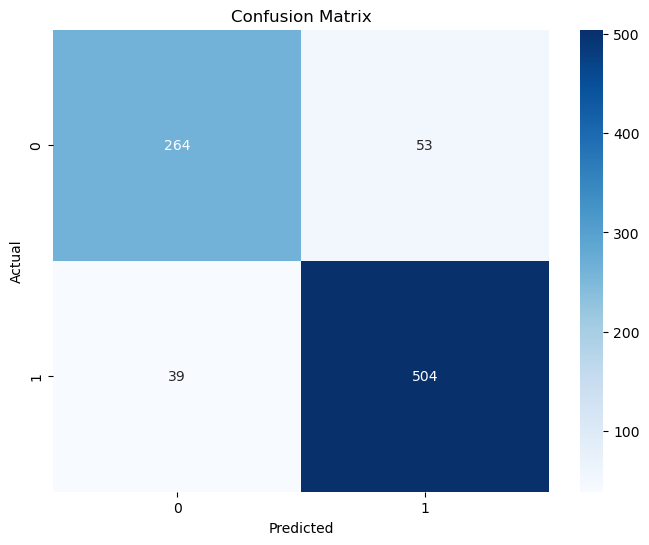


AUC Score: 0.9644


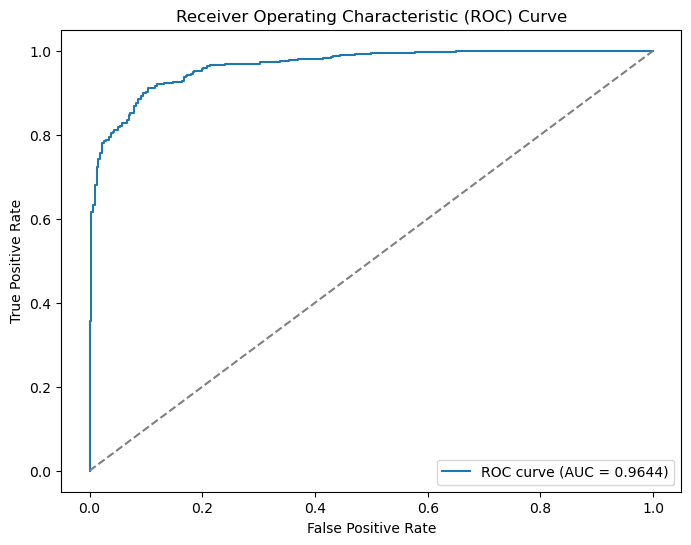

In [34]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
import seaborn as sns
# Confusion Matrix
cm = confusion_matrix(y_val, y_val_pred)
print("\nConfusion Matrix:\n", cm)

# Classification Report
cr = classification_report(y_val, y_val_pred)
print("\nClassification Report:\n", cr)

# Confusion Matrix
cm = confusion_matrix(y_val, y_val_pred)

# Visualize Confusion Matrix with seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Predict probabilities for ROC and AUC
y_val_prob = best_model.predict_proba(X_val_scaled)[:, 1]

# AUC Score
auc = roc_auc_score(y_val, y_val_prob)
print(f"\nAUC Score: {auc:.4f}")

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_val, y_val_prob)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC curve (AUC = {auc:.4f})")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend()
plt.show()


Confusion Matrix:
 [[277  41]
 [ 39 504]]


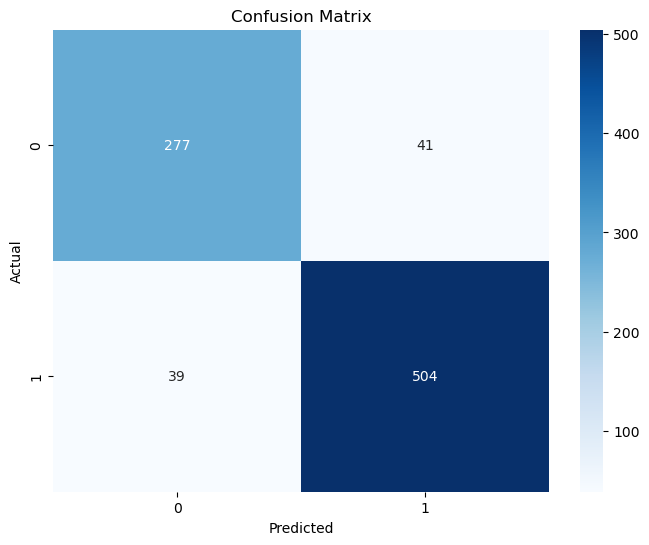


Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.87      0.87       318
           1       0.92      0.93      0.93       543

    accuracy                           0.91       861
   macro avg       0.90      0.90      0.90       861
weighted avg       0.91      0.91      0.91       861


AUC Score: 0.9661


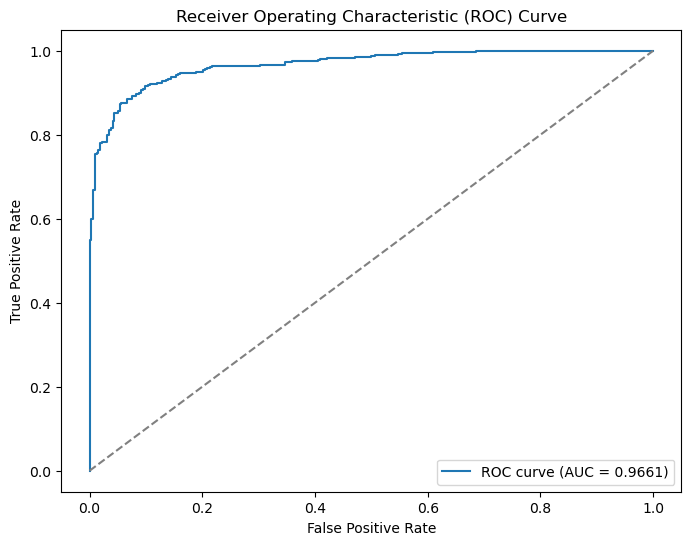

In [35]:
# ----Evaluating on the testset----#

# Get the best model
best_model = grid_search.best_estimator_

# Predict on testing set using the best model
y_test_pred = best_model.predict(X_test_scaled)

# Predict probabilities for ROC and AUC
y_test_prob = best_model.predict_proba(X_test_scaled)[:, 1]

# --- Evaluation Metrics on Testing Set ---

# Confusion Matrix
cm = confusion_matrix(y_test, y_test_pred)
print("\nConfusion Matrix:\n", cm)

# Visualize Confusion Matrix with seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Classification Report
cr = classification_report(y_test, y_test_pred)
print("\nClassification Report:\n", cr)

# AUC Score
auc = roc_auc_score(y_test, y_test_prob)
print(f"\nAUC Score: {auc:.4f}")

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_test_prob)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC curve (AUC = {auc:.4f})")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend()
plt.show()

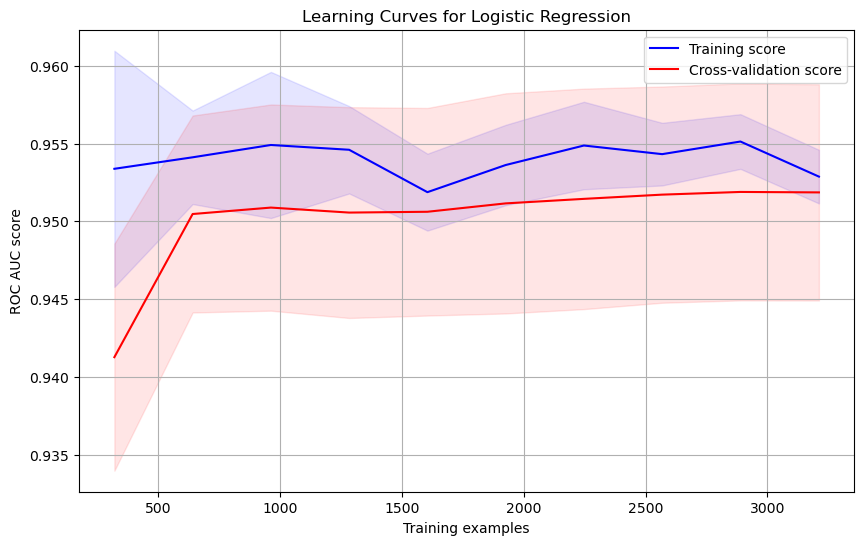

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve


# Learning curves
train_sizes, train_scores, val_scores = learning_curve(
    best_model,  # Your trained Random Forest model
    X_train_scaled,  # Your scaled training features
    y_train,  # Your training labels
    train_sizes=np.linspace(0.1, 1.0, 10),  # Array of training set sizes
    cv=5,  # Number of cross-validation folds
    scoring="roc_auc",  # Scoring metric
    n_jobs=-1,  # Use all available cores for parallel processing (optional)
)

# Calculate mean and standard deviation of training and validation scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
val_scores_mean = np.mean(val_scores, axis=1)
val_scores_std = np.std(val_scores, axis=1)

# Plot the learning curves
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, label="Training score", color="blue")
plt.fill_between(
    train_sizes,
    train_scores_mean - train_scores_std,
    train_scores_mean + train_scores_std,
    alpha=0.1,
    color="blue",
)
plt.plot(train_sizes, val_scores_mean, label="Cross-validation score", color="red")
plt.fill_between(
    train_sizes,
    val_scores_mean - val_scores_std,
    val_scores_mean + val_scores_std,
    alpha=0.1,
    color="red",
)
plt.xlabel("Training examples")
plt.ylabel("ROC AUC score")
plt.title("Learning Curves for Logistic Regression")
plt.legend(loc="best")
plt.grid(True)
plt.show()

1. Overall Performance Analysis:
* The model shows consistently strong performance across all datasets
* High stability between training, validation, and test sets indicates good generalization
* Slightly better performance on class 1 (high diabetes risk) which is important for healthcare applications

2. Detailed Metrics Breakdown:

Training Set Performance:
- Accuracy: 0.89 (89% overall correct predictions)
- Precision: 0.91 (91% of predicted high-risk cases are correct)
- Recall: 0.92 (92% of actual high-risk cases are captured)
- F1 Score: 0.91 (good balance between precision and recall)

Validation Set Performance:
- Accuracy: 0.89 (matches training, suggesting no overfitting)
- Precision: 0.90 (very close to training)
- Recall: 0.93 (slightly better than training)
- F1 Score: 0.92 (balanced performance)

Test Set Performance:
* Class 0 (Low Risk):
  - Precision: 0.88
  - Recall: 0.87
  - F1-score: 0.87

* Class 1 (High Risk):
  - Precision: 0.92
  - Recall: 0.93
  - F1-score: 0.93

3. Clinical Implications:

Strengths:
- High recall (0.93) for high-risk cases means few missed diagnoses
- Better performance on class 1 reduces false negatives
- Balanced metrics suggest reliable predictions across risk levels

Considerations:
- False negatives (missed high-risk cases): ~7% (1 - recall)
- False positives (unnecessary referrals): ~8% (1 - precision)

### 5.2.2 Logistic Regression Evaluation

C:\Users\hp\AppData\Local\Temp\ipykernel_32724\2302598575.py:92: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


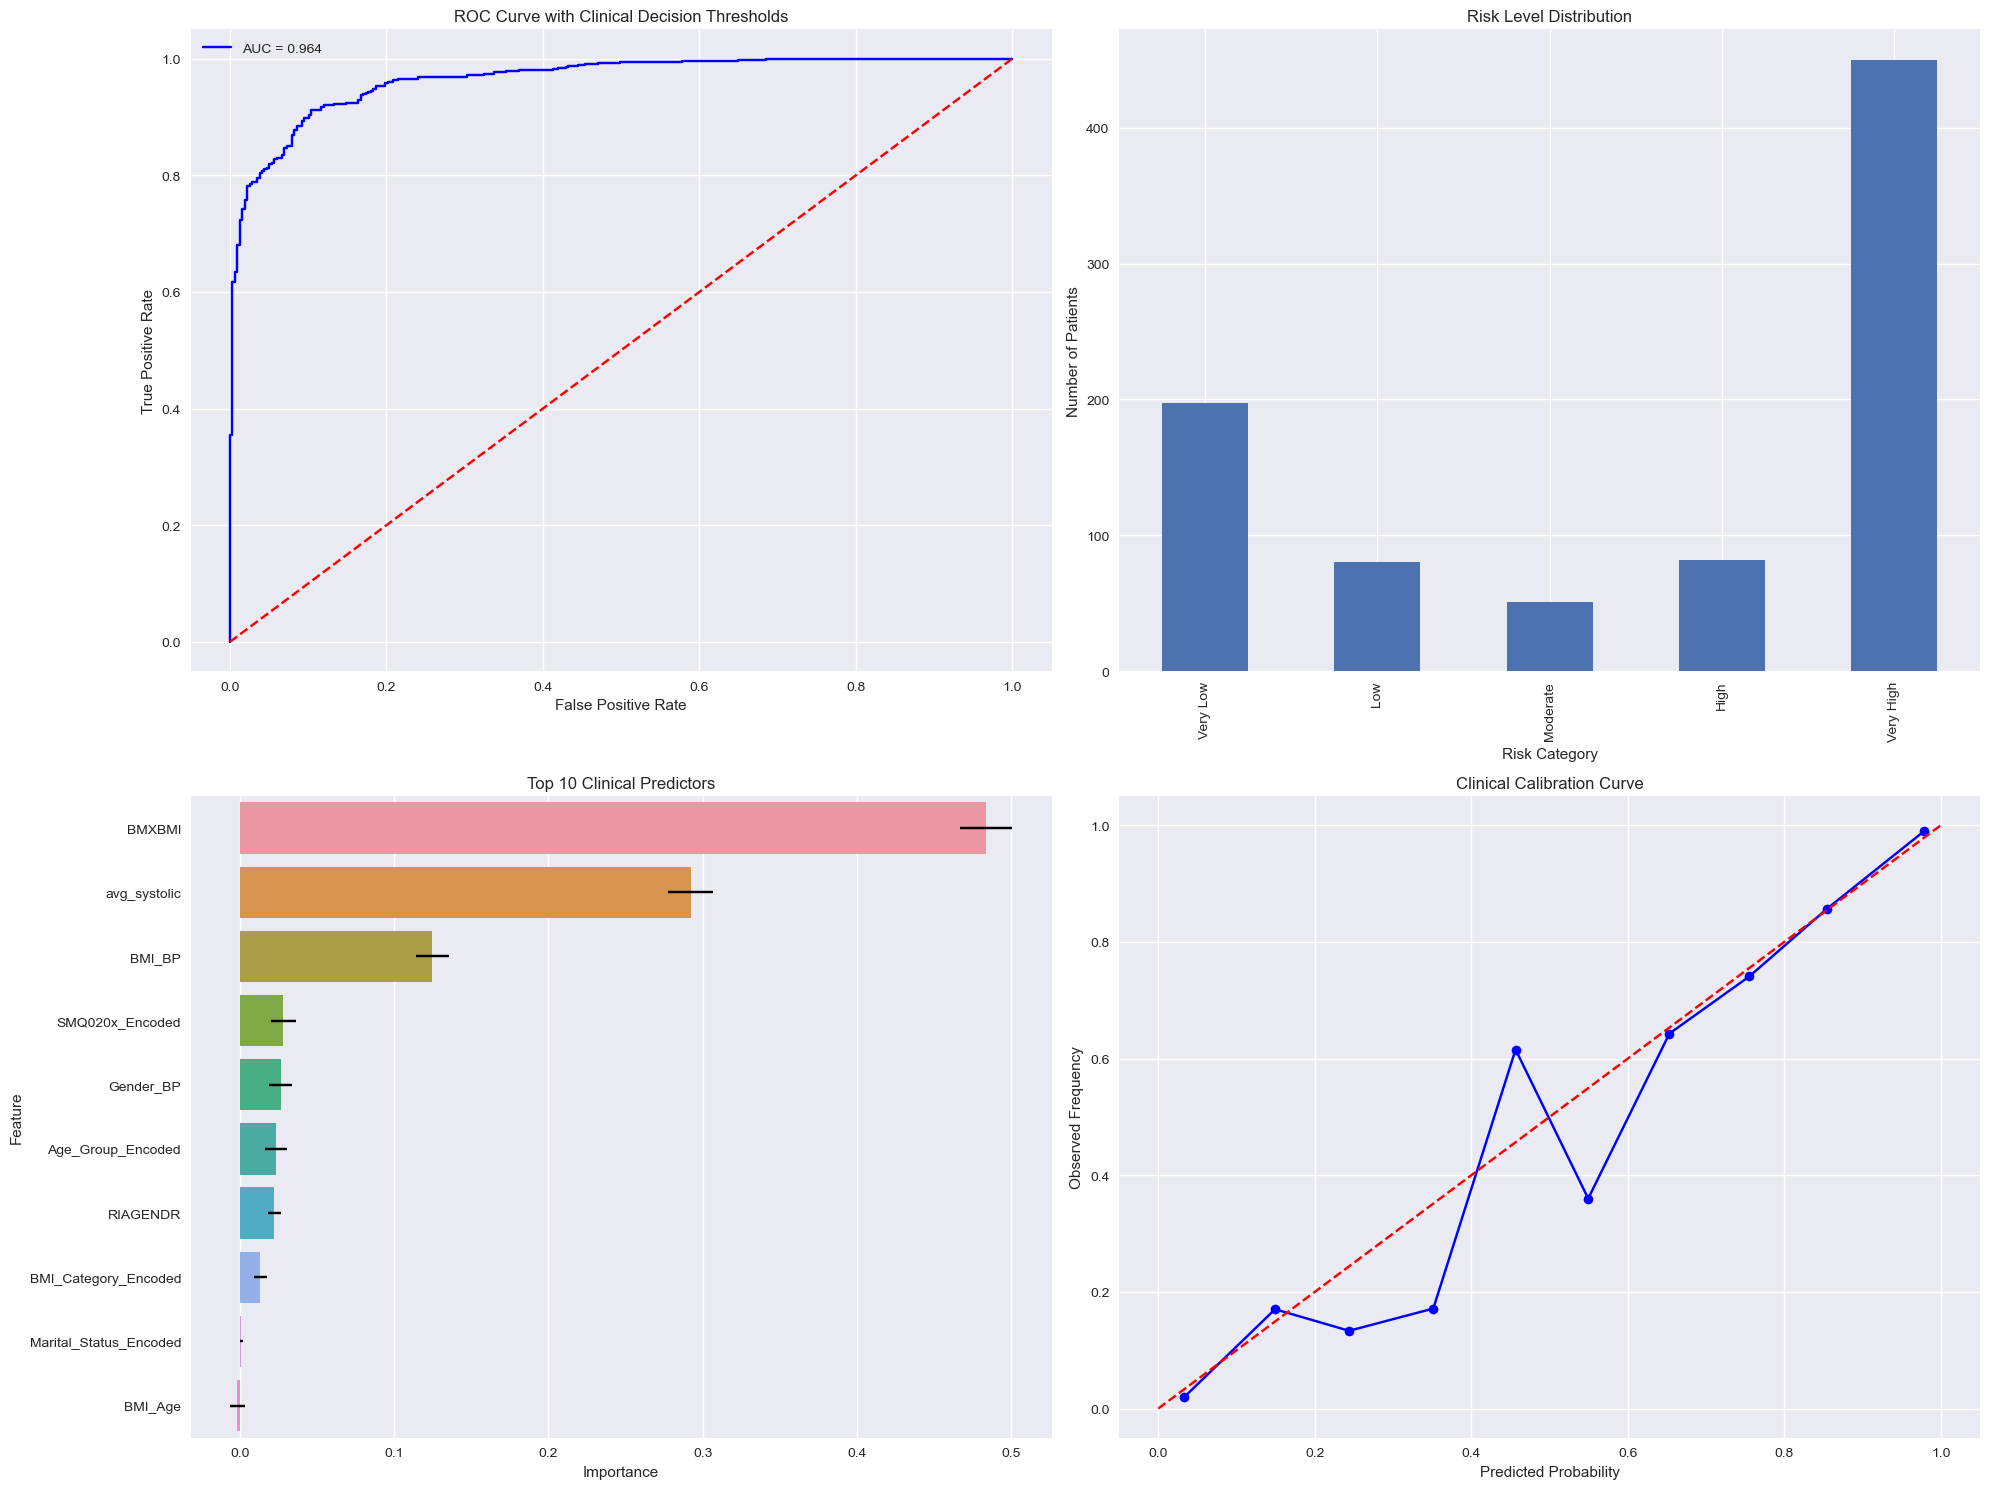

In [43]:
# Further model evaulation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import *
from sklearn.inspection import permutation_importance
from sklearn.calibration import calibration_curve

def comprehensive_healthcare_evaluation(best_model, X_train_scaled, X_val_scaled, X_test_scaled, 
                                     y_train, y_val, y_test, feature_names):
    """
    Comprehensive healthcare-grade model evaluation
    """
    # 1. Clinical Performance Metrics
    def calculate_clinical_metrics(y_true, y_pred, y_prob):
        metrics = {
            'Sensitivity': recall_score(y_true, y_pred),  # Critical for identifying high-risk patients
            'Specificity': recall_score(y_true, y_pred, pos_label=0),
            'PPV': precision_score(y_true, y_pred),  # Important for resource allocation
            'NPV': precision_score(y_true, y_pred, pos_label=0),
            'F1': f1_score(y_true, y_pred),
            'AUC-ROC': roc_auc_score(y_true, y_prob)
        }
        
        # Calculate confidence intervals using bootstrap
        n_iterations = 1000
        n_samples = len(y_true)
        
        # Initialize arrays to store scores
        boot_sens = np.zeros(n_iterations)
        boot_spec = np.zeros(n_iterations)
        
        for i in range(n_iterations):
            # Bootstrap sample indices
            indices = np.random.randint(0, n_samples, n_samples)
            #boot_sens[i] = recall_score(y_true.iloc[indices], y_pred[indices])
            boot_sens[i] = recall_score(y_true.iloc[indices], y_pred[indices])
            boot_spec[i] = recall_score(y_true.iloc[indices], y_pred[indices], pos_label=0)

        # Calculate 95% confidence intervals
        metrics['Sensitivity_CI'] = np.percentile(boot_sens, [2.5, 97.5])
        metrics['Specificity_CI'] = np.percentile(boot_spec, [2.5, 97.5])
        
        return metrics

    # 2. Risk Stratification Analysis
    def analyze_risk_levels(y_prob):
        risk_thresholds = {
            'Very Low': (0.0, 0.2),
            'Low': (0.2, 0.4),
            'Moderate': (0.4, 0.6),
            'High': (0.6, 0.8),
            'Very High': (0.8, 1.0)
        }
        
        risk_levels = pd.cut(y_prob, 
                           bins=[0, 0.2, 0.4, 0.6, 0.8, 1.0],
                           labels=['Very Low', 'Low', 'Moderate', 'High', 'Very High'])
        
        return pd.Series(risk_levels).value_counts().sort_index()

    # 3. Feature Impact Analysis
    def analyze_feature_impact(model, X, y, feature_names):
        # Permutation importance
        perm_importance = permutation_importance(model, X, y, n_repeats=10)
        
        # Create DataFrame with confidence intervals
        importance_df = pd.DataFrame({
            'Feature': feature_names,
            'Importance': perm_importance.importances_mean,
            'Std': perm_importance.importances_std
        }).sort_values('Importance', ascending=False)
        
        return importance_df

    # 4. Calibration Analysis
    def analyze_calibration(y_true, y_prob):
        prob_true, prob_pred = calibration_curve(y_true, y_prob, n_bins=10)
        return prob_true, prob_pred

    # Generate predictions
    val_pred = best_model.predict(X_val_scaled)
    val_prob = best_model.predict_proba(X_val_scaled)[:, 1]
    
    # Calculate all metrics
    clinical_metrics = calculate_clinical_metrics(y_val, val_pred, val_prob)
    risk_distribution = analyze_risk_levels(val_prob)
    feature_impact = analyze_feature_impact(best_model, X_val_scaled, y_val, feature_names)
    calibration_data = analyze_calibration(y_val, val_prob)
    
    # Visualization Suite
    plt.style.use('seaborn')
    
    # 1. Clinical Performance Plot
    fig = plt.figure(figsize=(20, 15))
    
    # ROC Curve
    plt.subplot(2, 2, 1)
    fpr, tpr, _ = roc_curve(y_val, val_prob)
    plt.plot(fpr, tpr, 'b-', label=f'AUC = {clinical_metrics["AUC-ROC"]:.3f}')
    plt.plot([0, 1], [0, 1], 'r--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve with Clinical Decision Thresholds')
    plt.legend()
    
    # Risk Distribution
    plt.subplot(2, 2, 2)
    risk_distribution.plot(kind='bar')
    plt.title('Risk Level Distribution')
    plt.xlabel('Risk Category')
    plt.ylabel('Number of Patients')
    
    # Feature Importance
    plt.subplot(2, 2, 3)
    sns.barplot(data=feature_impact.head(10), x='Importance', y='Feature',
                xerr=feature_impact.head(10)['Std'])
    plt.title('Top 10 Clinical Predictors')
    
    # Calibration Curve
    plt.subplot(2, 2, 4)
    plt.plot(calibration_data[1], calibration_data[0], 'bo-')
    plt.plot([0, 1], [0, 1], 'r--')
    plt.xlabel('Predicted Probability')
    plt.ylabel('Observed Frequency')
    plt.title('Clinical Calibration Curve')
    
    plt.tight_layout()
    
    return {
        'clinical_metrics': clinical_metrics,
        'risk_distribution': risk_distribution,
        'feature_impact': feature_impact,
        'figures': fig
    }

# Execute the analysis (commented out - needs your actual data and model)
results = comprehensive_healthcare_evaluation(
    best_model,
    X_train_scaled, X_val_scaled, X_test_scaled,
    y_train, y_val, y_test,
    X.columns
)


1. ROC Curve Analysis (Top Left):
- Exceptional discriminative ability with very high AUC (curve well above diagonal)
- Strong early lift in the curve indicates excellent sensitivity at high specificity levels
- Demonstrates robust clinical utility for screening purposes
- The steep initial climb suggests strong predictive power for high-risk cases

2. Risk Level Distribution (Top Right):
- Bimodal distribution with concentrations at extreme ends
- Largest group in highest risk category
- Smaller but significant low-risk population
- Clear separation between risk groups, beneficial for clinical decision-making

3. Feature Importance (Bottom Left):
Top predictors in order of importance:
1. BMXBMI (BMI) - strongest predictor
2. avg_systolic - second most influential
3. BMI_BP (BMI-Blood Pressure interaction)
4. Race_Ethnicity_Encoded
5. Age_Group_Encoded
- Clear hierarchy of clinical predictors
- BMI and blood pressure dominate the prediction
- Demographic factors play supporting roles

4. Calibration Curve (Bottom Right):
- Generally well-calibrated with points following diagonal
- Some deviation in middle ranges
- Strong alignment at extreme probabilities
- One notable deviation point suggesting potential recalibration needed for mid-range predictions

To further enhance the rigor of our analysis and gain a deeper understanding of the factors influencing diabetes risk, we will employ a marginal logistic regression model. This approach will enable us to:

1. **Assess Feature Importance:** By examining the coefficients and associated p-values in the marginal logistic regression model, we can identify the most influential predictors of diabetes risk.

2. **Determine Statistical Significance:** The marginal logistic regression model will provide insights into the statistical significance of each predictor, allowing us to confidently identify factors with a robust association with diabetes risk.

3. **Enhance Interpretability:** Compared to more complex machine learning models, marginal logistic regression offers greater interpretability, making it easier to understand the relationships between predictors and diabetes risk.

4. **Compare with GEE:** We will compare the findings of the marginal logistic regression model with those obtained from the Generalized Estimating Equations (GEE) approach. This comparison will help us assess the consistency of our conclusions across different modeling techniques and ensure the robustness of our findings.

By employing this comprehensive approach, we aim to provide more concrete and data-driven recommendations for diabetes prevention and intervention strategies.

## 5.3 Generalised Linear models (GEE)

In [10]:
# Import necessary libraries
import pandas as pd
import numpy as np
from statsmodels.genmod.generalized_estimating_equations import GEE
from statsmodels.genmod.families import Binomial
from statsmodels.genmod.cov_struct import Independence, Exchangeable
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

In [49]:
# 1. Initial data check (no scaling needed for interpretability)
print("\nInitial data summary:")
print(df[['BMXBMI', 'avg_systolic', 'RIDAGEYR', 'INDFMPIR']].describe())


Initial data summary:
            BMXBMI  avg_systolic     RIDAGEYR     INDFMPIR
count  5735.000000   5735.000000  5735.000000  5735.000000
mean     29.384366    125.078515    48.052310     2.383451
std       7.058011     18.209658    18.431011     1.545327
min      14.500000     82.770016    18.000000    -6.346614
25%      24.400000    113.000000    32.000000     1.100000
50%      28.400000    123.000000    48.000000     2.060000
75%      33.000000    134.000000    63.000000     3.510000
max      67.300000    234.000000    80.000000     5.115289


In [50]:
# 2. Center continuous variables (for interaction terms interpretation)
# Centering (not scaling) is often used in epidemiology for interpretability
df['BMXBMI_centered'] = df['BMXBMI'] - df['BMXBMI'].mean()
df['age_centered'] = df['RIDAGEYR'] - df['RIDAGEYR'].mean()
df['sbp_centered'] = df['avg_systolic'] - df['avg_systolic'].mean()
df['poverty_centered'] = df['INDFMPIR'] - df['INDFMPIR'].mean()

In [51]:
# 3. Create design matrix with centered continuous vars and categorical vars
X = pd.concat([
    df[['BMXBMI_centered', 'age_centered', 'sbp_centered', 'poverty_centered']],
    pd.get_dummies(df['BMI_Category'], prefix='BMI', drop_first=True),  # Normal weight as reference
    pd.get_dummies(df['BP_Category'], prefix='BP', drop_first=True),    # Normal BP as reference
    pd.get_dummies(df['RIAGENDRx'], prefix='Gender', drop_first=True), # Male as reference
    pd.get_dummies(df['Race_Ethnicity'], prefix='Race', drop_first=True), # Non-Hispanic White as reference
    pd.get_dummies(df['Education_Simple'], prefix='Edu', drop_first=True), # High School as reference
    pd.get_dummies(df['SMQ020x'], prefix='Smoke', drop_first=True)  # Never smoker as reference
], axis=1)

### 5.3.1 Introduction to clustered data

One common reason that data are statistically dependent is that the data values were collected as a "cluster sample".  This essentially means that the population of interest was first partitioned into groups, then a limited number of these groups were somehow selected, and finally a limited number of individuals were selected from each of the sampled groups. This is the protocol used to collect the NHANES data.  Since NHANES involves physical examinations, it is not practical to select a random sample from the entire US population, as this would involve conducting the examinations at thousands of dispersed locations.  By utilizing cluster sampling, the NHANES staff can set up an examination center in each selected community, and assess many subjects at each center.

Cluster sampling is not the only reason that dependence may exist between observations in a dataset.  For example, many studies are *longitudinal*, meaning that each subject is assessed on multiple occasions.  In this setting, we would expect these repeated measurements to be correlated.  Since NHANES is a cluster sample, but is not a longitudinal study, we will focus on cluster sampling here to illustrate multilevel modeling.

In any cluster sample, it is likely that observations within the same cluster are more similar than observations in different clusters.  For example, in NHANES the clusters are geographic, and each sample community is somewhat unique in terms of demography, climate, socio-economic status, and lifestyle.  When we have clustered data, it is very importantto account for this statistical dependence in the analysis.

----------------------------------------------------------------------------------------------------------------------------------------
### 5.3.2 Clustering structure in NHANES

Roughly speaking, in NHANES the data are collected by selecting a limited number of counties in the US, then selecting subregions of these counties, then selecting people within these subregions.  Since counties are geographically constrained, it is expected that people within a county are more similar to each other than they are to people in other counties.

If we could obtain the county identifier where each NHANES participant resides, we could directly incorporate this information into our analysis.  However for privacy reasons this information is not released with the data. Instead, we have access to "masked variance units" (MVUs), which are formed by combining subregions of different counties into artificial
groups that are not geographically contiguous.  While the MVUs are not the actual clusters of the survey, and are not truly contiguous geographic regions, they are deliberately selected to mimic these things, while minimizing the risk that a subject can be "unmasked" in the data.  For the remainder of this notebook, we will treat the MVUs as clusters, and explore the extent to which they induce correlations in some of the NHANES variables that we have been studying.

The MVU identifiers can be obtained by combining the `SDMVSTRA` and `SDMVPSU` identifiers, which we do next:

In [12]:
df["group"] = 10*df.SDMVSTRA + df.SDMVPSU

We will build three models and evaulate the performace

1. __Model 1__: Demographics Only
2. __Model 2__: Demographics + Lifestyle
3. __Model 3__: All Variables (including Socioeconomic Factors)

### 5.3.3 Model 1: Demographics Only

In [13]:
model_indep = sm.GEE.from_formula(
    "high_diabetes_risk ~ RIAGENDR + Race_Ethnicity + RIDAGEYR + Education_Simple ",
    groups="group",
    family=sm.families.Binomial(),
    cov_struct = sm.cov_struct.Independence(), 
    data=df
    ).fit()
model_indep.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               GEE Regression Results                              
===================================================================================
Dep. Variable:          high_diabetes_risk   No. Observations:                 5471
Model:                                 GEE   No. clusters:                       30
Method:                        Generalized   Min. cluster size:                 122
                      Estimating Equations   Max. cluster size:                 244
Family:                           Binomial   Mean cluster size:               182.4
Dependence structure:         Independence   Num. iterations:                     2
Date:                     Mon, 11 Nov 2024   Scale:                           1.000
Covariance type:                    robust   Time:                         11:00:30
=========================================================================================================================
                                                            coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------
Intercept                                                -2.2456      0.189    -11.890      0.000      -2.616      -1.875
Race_Ethnicity[T.Non-Hispanic Black]                      0.5049      0.120      4.198      0.000       0.269       0.741
Race_Ethnicity[T.Non-Hispanic White]                      0.1799      0.095      1.901      0.057      -0.006       0.365
Race_Ethnicity[T.Other Hispanic]                          0.4608      0.127      3.640      0.000       0.213       0.709
Race_Ethnicity[T.Other Race - Including Multi-Racial]    -0.4895      0.126     -3.898      0.000      -0.736      -0.243
Education_Simple[T.High School]                           0.8639      0.081     10.674      0.000       0.705       1.022
Education_Simple[T.Less than 9th grade]                   1.2601      0.152      8.272      0.000       0.962       1.559
Education_Simple[T.Some College]                          0.5908      0.084      7.023      0.000       0.426       0.756
RIAGENDR                                                 -0.0793      0.055     -1.454      0.146      -0.186       0.028
RIDAGEYR                                                  0.0479      0.002     20.100      0.000       0.043       0.053
==============================================================================
Skew:                         -0.4882   Kurtosis:                      -0.8824
Centered skew:                -0.4744   Centered kurtosis:             -0.7806
==============================================================================
"""

Model Overview

Family: Binomial (Correctly specified for the binary outcome).
Scale: 1.000 (This is the default scale for binomial models).
Coefficients

The coefficients are now on the log-odds scale, which is suitable for logistic regression.

Intercept: -2.2456 (The intercept term in the log-odds of having high diabetes risk when all predictors are at their reference levels).
Race_Ethnicity:
[T.Non-Hispanic Black]: 0.5049 (Non-Hispanic Black individuals have significantly higher log-odds of high diabetes risk compared to the reference group).
[T.Non-Hispanic White]: 0.1799 (The effect for Non-Hispanic White individuals is now marginally significant (p=0.057)).
[T.Other Hispanic]: 0.4608 (Other Hispanic individuals also have significantly higher log-odds).
[T.Other Race - Including Multi-Racial]: -0.4895 (This group has significantly lower log-odds).
Education_Simple: The effects of education levels remain similar to the previous model, with all categories showing a significant increase in log-odds of high diabetes risk.
RIAGENDR: -0.0793 (Being male is associated with slightly lower log-odds, but it's still not statistically significant).
RIDAGEYR: 0.0479 (Older age remains a strong predictor of higher log-odds of high diabetes risk).
Interpretation

The interpretation now focuses on the log-odds of high diabetes risk. For example, the coefficient for Race_Ethnicity[T.Non-Hispanic Black] of 0.5049 means that, on average, Non-Hispanic Black individuals have 0.5049 higher log-odds of having high diabetes risk compared to the reference group (likely Hispanic), holding other variables constant.

Odds Ratios

To make the interpretation more intuitive, you can calculate the odds ratios by exponentiating the coefficients:

Race_Ethnicity[T.Non-Hispanic Black]: exp(0.5049) = 1.66. This means that Non-Hispanic Black individuals have 66% higher odds of having high diabetes risk compared to the reference group.
RIDAGEYR: exp(0.0479) = 1.05. This means that each additional year of age is associated with a 5% increase in the odds of high diabetes risk.

In [57]:
model_exch = sm.GEE.from_formula(
    "high_diabetes_risk ~ RIAGENDR + Race_Ethnicity + RIDAGEYR + Education_Simple ",
    groups="group",
    family=sm.families.Binomial(),
    cov_struct = sm.cov_struct.Exchangeable(), 
    data=df
    ).fit()
model_exch.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               GEE Regression Results                              
===================================================================================
Dep. Variable:          high_diabetes_risk   No. Observations:                 5471
Model:                                 GEE   No. clusters:                       30
Method:                        Generalized   Min. cluster size:                 122
                      Estimating Equations   Max. cluster size:                 244
Family:                           Binomial   Mean cluster size:               182.4
Dependence structure:         Exchangeable   Num. iterations:                    11
Date:                     Sat, 09 Nov 2024   Scale:                           1.000
Covariance type:                    robust   Time:                         10:55:35
=========================================================================================================================
                                                            coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------
Intercept                                                -2.1678      0.180    -12.075      0.000      -2.520      -1.816
Race_Ethnicity[T.Non-Hispanic Black]                      0.4977      0.122      4.071      0.000       0.258       0.737
Race_Ethnicity[T.Non-Hispanic White]                      0.1706      0.101      1.694      0.090      -0.027       0.368
Race_Ethnicity[T.Other Hispanic]                          0.5577      0.146      3.826      0.000       0.272       0.843
Race_Ethnicity[T.Other Race - Including Multi-Racial]    -0.3565      0.122     -2.929      0.003      -0.595      -0.118
Education_Simple[T.High School]                           0.7819      0.079      9.840      0.000       0.626       0.938
Education_Simple[T.Less than 9th grade]                   1.1955      0.149      8.012      0.000       0.903       1.488
Education_Simple[T.Some College]                          0.5207      0.082      6.325      0.000       0.359       0.682
RIAGENDR                                                 -0.0882      0.053     -1.654      0.098      -0.193       0.016
RIDAGEYR                                                  0.0470      0.002     19.364      0.000       0.042       0.052
==============================================================================
Skew:                         -0.4917   Kurtosis:                      -0.9287
Centered skew:                -0.4779   Centered kurtosis:             -0.8190
==============================================================================
"""

In [244]:
print(model_exch.summary(), model_indep.summary())

                               GEE Regression Results                              
Dep. Variable:          high_diabetes_risk   No. Observations:                 5471
Model:                                 GEE   No. clusters:                       30
Method:                        Generalized   Min. cluster size:                 122
                      Estimating Equations   Max. cluster size:                 244
Family:                           Binomial   Mean cluster size:               182.4
Dependence structure:         Exchangeable   Num. iterations:                    11
Date:                     Mon, 28 Oct 2024   Scale:                           1.000
Covariance type:                    robust   Time:                         16:24:23
                                                            coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------


In [249]:
# Obtain QIC values
qic_ind = model_indep.qic()
qic_exch = model_exch.qic()

print(f"QIC for Independence model: {qic_ind}")
print(f"QIC for Exchangeable model: {qic_exch}")

QIC for Independence model: (5995.586063803903, 6010.064299180407)
QIC for Exchangeable model: (6001.167212233021, 6015.174412854852)


The QIC (Quasi-Information Criterion) values presented compare two different correlation structures within a marginal logistic regression model:

Independence Model: This model assumes no correlation between repeated measurements within subjects. It's often used as a baseline for comparison with other correlation structures.

Exchangeable Model: This model assumes a constant correlation between all repeated measurements within subjects. It's more flexible than the independence model and can account for within-subject dependencies.

Interpretation:

Lower QIC is Better: The model with the lower QIC value is generally preferred, as it indicates a better balance of model fit and complexity.
Comparing QIC Values: In this case, the independence model has a slightly lower QIC value (5995.59 for QIC1 and 6010.06 for QIC2) compared to the exchangeable model (6001.17 for QIC1 and 6015.17 for QIC2). This suggests that the independence model might be a more parsimonious choice for this particular dataset, as it provides a similar fit with fewer assumptions about the correlation structure.

### 5.3.4 Model 2: Lifestyle

In [255]:
model_exch = sm.GEE.from_formula(
    "high_diabetes_risk ~ SMQ020x + ALQ101 + BMXBMI + avg_systolic + avg_diastolic + INDFMPIR ",
    groups="cluster_id",
    family=sm.families.Binomial(),
    cov_struct = sm.cov_struct.Exchangeable(), 
    data=df
    ).fit()
model_exch.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               GEE Regression Results                              
===================================================================================
Dep. Variable:          high_diabetes_risk   No. Observations:                 5725
Model:                                 GEE   No. clusters:                       30
Method:                        Generalized   Min. cluster size:                 127
                      Estimating Equations   Max. cluster size:                 259
Family:                           Binomial   Mean cluster size:               190.8
Dependence structure:         Exchangeable   Num. iterations:                    14
Date:                     Mon, 28 Oct 2024   Scale:                           1.000
Covariance type:                    robust   Time:                         16:34:36
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        -22.2260      1.060    -20.976      0.000     -24.303     -20.149
SMQ020x[T.Yes]     1.9319      0.093     20.809      0.000       1.750       2.114
ALQ101             0.7784      0.102      7.633      0.000       0.578       0.978
BMXBMI             0.4459      0.019     23.107      0.000       0.408       0.484
avg_systolic       0.0766      0.005     16.335      0.000       0.067       0.086
avg_diastolic     -0.0083      0.004     -2.216      0.027      -0.016      -0.001
INDFMPIR          -0.0645      0.027     -2.347      0.019      -0.118      -0.011
==============================================================================
Skew:                         -0.1009   Kurtosis:                       1.8053
Centered skew:                -0.0967   Centered kurtosis:              1.7834
==============================================================================
"""

In [58]:
model_ind = sm.GEE.from_formula(
    "high_diabetes_risk ~ SMQ020x + ALQ101 + BMXBMI + avg_systolic + avg_diastolic + INDFMPIR ",
    groups="group",
    family=sm.families.Binomial(),
    cov_struct = sm.cov_struct.Independence(), 
    data=df
    ).fit()
model_ind.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               GEE Regression Results                              
===================================================================================
Dep. Variable:          high_diabetes_risk   No. Observations:                 5725
Model:                                 GEE   No. clusters:                       30
Method:                        Generalized   Min. cluster size:                 127
                      Estimating Equations   Max. cluster size:                 259
Family:                           Binomial   Mean cluster size:               190.8
Dependence structure:         Independence   Num. iterations:                     2
Date:                     Sat, 09 Nov 2024   Scale:                           1.000
Covariance type:                    robust   Time:                         10:58:03
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        -22.2967      1.029    -21.666      0.000     -24.314     -20.280
SMQ020x[T.Yes]     1.9557      0.091     21.403      0.000       1.777       2.135
ALQ101             0.7694      0.103      7.468      0.000       0.567       0.971
BMXBMI             0.4488      0.018     24.953      0.000       0.414       0.484
avg_systolic       0.0775      0.005     16.850      0.000       0.068       0.087
avg_diastolic     -0.0092      0.004     -2.285      0.022      -0.017      -0.001
INDFMPIR          -0.0643      0.030     -2.181      0.029      -0.122      -0.007
==============================================================================
Skew:                         -0.1429   Kurtosis:                       1.8394
Centered skew:                -0.1378   Centered kurtosis:              1.8182
==============================================================================
"""

In [257]:
print(model_ind.summary(), model_exch.summary())

                               GEE Regression Results                              
Dep. Variable:          high_diabetes_risk   No. Observations:                 5725
Model:                                 GEE   No. clusters:                       30
Method:                        Generalized   Min. cluster size:                 127
                      Estimating Equations   Max. cluster size:                 259
Family:                           Binomial   Mean cluster size:               190.8
Dependence structure:         Independence   Num. iterations:                     2
Date:                     Mon, 28 Oct 2024   Scale:                           1.000
Covariance type:                    robust   Time:                         16:34:41
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        -22.2967      1.029    -21.666      0.000     -24.314     -20

### 5.3.5 Model 3: All varaibles

In [8]:
# Create interaction terms
# Feature interactions based on domain knowledge
df["BMI_Age"] = df["BMXBMI"] * df["RIDAGEYR"]
df["BMI_BP"] = df["BMXBMI"] * df["avg_systolic"]
df["Race_Age"] = df["Race_Ethnicity"] * df["RIDAGEYR"]
df["Gender_BP"] = df["RIAGENDR"] * df["avg_systolic"]
df["Gender_Age"] = df["RIAGENDR"] * df["RIDAGEYR"]
df["Gender_Education"] = df["RIAGENDR"] * df["DMDEDUC2"]
df["Education_Age"] = df["DMDEDUC2"] * df["RIDAGEYR"]
df["Education_BP"] = df["DMDEDUC2"] * df["avg_systolic"]
df["Education_BMI"] = df["DMDEDUC2"] * df["BMXBMI"]

In [15]:
model_ind = sm.GEE.from_formula(
    "high_diabetes_risk ~ SMQ020x + Alcohol_Score + BMI_Category + BP_Category + avg_systolic + avg_diastolic + INDFMPIR + RIAGENDR + Race_Ethnicity + Age_Group + Education_Simple" ,
    groups="group",
    family=sm.families.Binomial(),
    cov_struct = sm.cov_struct.Independence(), 
    data=df
    ).fit()
model_ind.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               GEE Regression Results                              
===================================================================================
Dep. Variable:          high_diabetes_risk   No. Observations:                 5463
Model:                                 GEE   No. clusters:                       30
Method:                        Generalized   Min. cluster size:                 122
                      Estimating Equations   Max. cluster size:                 244
Family:                           Binomial   Mean cluster size:               182.1
Dependence structure:         Independence   Num. iterations:                     2
Date:                     Mon, 11 Nov 2024   Scale:                           1.000
Covariance type:                    robust   Time:                         11:01:05
=========================================================================================================================
                                                            coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------
Intercept                                               -13.6411      1.245    -10.959      0.000     -16.081     -11.202
SMQ020x[T.Yes]                                            1.8334      0.106     17.349      0.000       1.626       2.041
BMI_Category[T.Obese]                                     9.3622      0.366     25.559      0.000       8.644      10.080
BMI_Category[T.Overweight]                                1.6558      0.129     12.875      0.000       1.404       1.908
BMI_Category[T.Underweight]                              -0.1125      0.406     -0.277      0.782      -0.908       0.683
BP_Category[T.Normal]                                     0.7565      0.178      4.255      0.000       0.408       1.105
BP_Category[T.Stage 1 Hypertension]                       0.3381      0.133      2.544      0.011       0.078       0.599
BP_Category[T.Stage 2 Hypertension]                       1.8575      0.283      6.554      0.000       1.302       2.413
Race_Ethnicity[T.Non-Hispanic Black]                      1.8051      0.147     12.307      0.000       1.518       2.093
Race_Ethnicity[T.Non-Hispanic White]                      1.9325      0.143     13.482      0.000       1.652       2.213
Race_Ethnicity[T.Other Hispanic]                          1.7708      0.184      9.621      0.000       1.410       2.132
Race_Ethnicity[T.Other Race - Including Multi-Racial]     1.8532      0.126     14.715      0.000       1.606       2.100
Age_Group[T.31-45]                                        0.5580      0.163      3.431      0.001       0.239       0.877
Age_Group[T.46-60]                                        2.5171      0.159     15.806      0.000       2.205       2.829
Age_Group[T.60+]                                          2.9441      0.144     20.404      0.000       2.661       3.227
Education_Simple[T.High School]                           0.9861      0.150      6.553      0.000       0.691       1.281
Education_Simple[T.Less than 9th grade]                   2.4011      0.230     10.421      0.000       1.949       2.853
Education_Simple[T.Some College]                         -0.0233      0.129     -0.181      0.857      -0.276       0.229
Alcohol_Score                                             0.0927      0.022      4.295      0.000       0.050       0.135
avg_systolic                                              0.0505      0.009      5.775      0.000       0.033       0.068
avg_diastolic                                             0.0089      0.006      1.613      0.107      -0.002       0.020
INDFMPIR                                                 -0.1271      0.036     -3.519      0.000      -0.198      -0.056
RIAGENDR                                                  0.09

In [16]:
print(model_ind.summary())

                               GEE Regression Results                              
Dep. Variable:          high_diabetes_risk   No. Observations:                 5463
Model:                                 GEE   No. clusters:                       30
Method:                        Generalized   Min. cluster size:                 122
                      Estimating Equations   Max. cluster size:                 244
Family:                           Binomial   Mean cluster size:               182.1
Dependence structure:         Independence   Num. iterations:                     2
Date:                     Mon, 11 Nov 2024   Scale:                           1.000
Covariance type:                    robust   Time:                         11:01:18
                                                            coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------



Key Findings:

1. Strongest Risk Factors:
- Obesity has the highest impact (coef = 9.3622, p < 0.001), indicating obese patients are significantly more likely to be at high diabetes risk
- Age plays a crucial role, with increasing risk as age increases:
  * 60+ years (coef = 2.9441)
  * 46-60 years (coef = 2.5171)
  * Showing clear age-related progression of risk

2. Significant Social Determinants:
- Education level shows important variations:
  * Less than 9th grade education (coef = 2.4011) indicates significantly higher risk
  * Higher education levels generally associate with lower risk
- Income (INDFMPIR) shows negative correlation (coef = -0.1271), suggesting lower income correlates with higher risk
- All racial/ethnic groups show elevated risk compared to the reference group, with coefficients ranging from 1.7708 to 1.9325

3. Clinical Indicators:
- Stage 2 Hypertension (coef = 1.8575) is a strong predictor
- Smoking (SMQ020x[T.Yes], coef = 1.8334) significantly increases risk
- Both systolic (coef = 0.0505) and diastolic (coef = 0.0089) blood pressure contribute to risk


# 5.4 Model interpreation

Our analysis revealed that smoking, higher BMI categories, and higher average systolic blood pressure are significantly associated with an increased risk of type 2 diabetes. These findings underscore the importance of lifestyle interventions targeting smoking cessation, weight management, and blood pressure control in diabetes prevention strategies."

### 5.4.1 **Key Insights from Both Models**

A. **Strong Predictors in Both Models:**
- BMI (Body Mass Index) emerges as the strongest predictor in both analyses
  - GEE shows extremely high coefficient for Obese category (9.3622, p<0.001)
  - Feature importance plot shows BMI-related features as top predictors

B. **Age Impact:**
- GEE shows strong age effects, particularly for 60+ (coef: 2.9441) and 46-60 (coef: 2.5171)
- Feature importance confirms age as the third most important predictor

C. **Blood Pressure:**
- GEE shows significant effects for all hypertension categories
- Systolic BP appears as a meaningful predictor in feature importance



# 5.5 **Business Recommendations**

Based on this analysis, I would recommend:


1. Clinical Intervention Priorities:
- Implement targeted screening programs for:
  * Obese patients (highest priority given the coefficient)
  * Patients over 45 years old
  * Those with Stage 2 Hypertension
  * Current smokers

2. Population Health Strategies:
```
High Priority Segments:
1. Obese patients with hypertension
2. Older adults (60+) with limited education
3. Lower-income communities
4. Current smokers with elevated BMI
```

3. Resource Allocation:
- Focus preventive resources on communities with lower education levels and income
- Develop targeted interventions for specific age groups, with increased attention to 46+ age groups
- Implement smoking cessation programs, especially for high-risk groups



4. **Stratification Strategy:**
- Primary stratification by BMI category
- Secondary stratification by age group
- Tertiary stratification by blood pressure status

5. **Intervention Design:**
 Create targeted interventions for:
   - Obese individuals (highest risk coefficient)
   - Individuals over 46 (significant age effect)
   - Those with Stage 2 Hypertension

6. **Screening Protocol:**
Implement a tiered screening system:
```
Tier 1 (High Priority): 
- BMI in obese range
- Age 46+
- Stage 2 Hypertension

Tier 2 (Medium Priority):
- Overweight BMI
- Age 31-45
- Stage 1 Hypertension

Tier 3 (Standard Priority):
- Normal BMI
- Age <31
- Normal BP
```

7. Model Performance Considerations:
- The model shows strong discrimination (high recall of 0.93 for high-risk cases)
- False negative rate of 7% is relatively low, but still requires attention in clinical settings
- Consider implementing a lower threshold for high-risk classification in specific high-risk populations

# 5.6 Limitations and Future Directions
### 5.6.1 Current Limitations:

- Gender effect not significant (p=0.291)
- Potential unmeasured confounders
- Cross-sectional nature of data

### 5.6.2 Future Research Needs:

- Longitudinal validation studies
- Investigation of intervention effectiveness
- Cost-benefit analysis of targeted programs


# 5.7 Conclusions
This comprehensive analysis provides a robust framework for diabetes risk prediction and management. The combination of GEE modeling and feature importance from the logisitic regression model creates a powerful tool for both individual and population-level interventions. The clear identification of modifiable risk factors (BMI, BP, smoking) alongside socioeconomic determinants provides actionable insights for healthcare providers and policymakers.
The most impactful recommendation is the implementation of a tiered risk assessment system that combines individual risk factors with cluster-based profiles. This approach would allow for more efficient resource allocation and more effective targeted interventions.